In [15]:
import os, shutil
original_dataset_dir = 'D:\AI_ML\Dog_vs_Cat\petImages'
base_dir = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#Loading cat images into train, validation, and test directories
fnames = ['cat({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


#Loading dog images into train, validation, and test directories
fnames = ['dog({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [16]:
print('total cat training images: ', len(os.listdir(train_cats_dir)))
print('total dog training images: ', len(os.listdir(train_dogs_dir)))
print('total cat validation images: ', len(os.listdir(validation_cats_dir)))
print('total dog validation images: ', len(os.listdir(validation_dogs_dir)))
print('total cat test images: ', len(os.listdir(test_cats_dir)))
print('total dog test images: ', len(os.listdir(test_dogs_dir)))

total cat training images:  999
total dog training images:  999
total cat validation images:  500
total dog validation images:  500
total cat test images:  500
total dog test images:  500


In [17]:
import keras
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))


In [18]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

model.save('dogs_and_cats_small_1.h5')

Epoch 1/30
100/100 [==============================] - 21s 215ms/step - loss: 0.6825 - acc: 0.5666 - val_loss: 0.6493 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6675 - acc: 0.5896 - val_loss: 0.6260 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6543 - acc: 0.6256 - val_loss: 0.6746 - val_acc: 0.5800
Epoch 4/30
100/100 [==============================] - 18s 184ms/step - loss: 0.6413 - acc: 0.6371 - val_loss: 0.5454 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 18s 182ms/step - loss: 0.6197 - acc: 0.6627 - val_loss: 0.5616 - val_acc: 0.6430
Epoch 6/30
100/100 [==============================] - 18s 182ms/step - loss: 0.5998 - acc: 0.6807 - val_loss: 0.5779 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 18s 183ms/step - loss: 0.5770 - acc: 0.7042 - val_loss: 0.4788 - val_acc: 0.6500
Epoch 8/30
100/100 [==============================] - 1

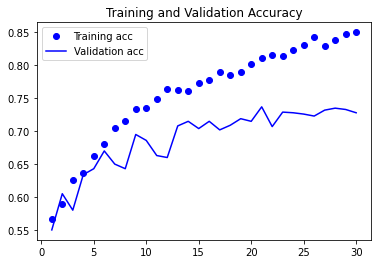

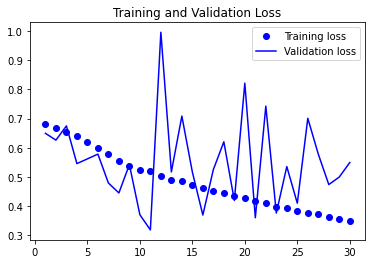

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()